In [17]:
# Make IPython notebook wider see -> https://gist.github.com/paulochf/f6c9ed0b39f85dd85270

# from IPython.display import display, HTML

# display(HTML(data="""
# <style>
#     div#notebook-container    { width: 95%; }
#     div#menubar-container     { width: 65%; }
#     div#maintoolbar-container { width: 99%; }
# </style>
# """))

In [18]:
# Static inline plots
# %matplotlib inline

# External qt plots
# %matplotlib qt

# Interactive plots
%matplotlib notebook

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import numpy as np
import scipy.signal
import os
# plt.rcParams["figure.figsize"] = (13,13)
np.set_printoptions(precision=4)
pd.options.display.max_rows = 4

data = None

# Read all file in folder
folder = 'SpectralReflectanceData'
for fileName in os.listdir(folder):
    if '.csv' in fileName:

        colName = fileName[16:-4]
        tmp = pd.read_csv(f'{folder}/{fileName}', sep=";", index_col=0, names=[colName])

        # Merge the file to one bigger array with correctly labeled coloms
        if data is None:
            data = tmp
        else:
            data[colName] = tmp[colName]

# print(data.head())
# print(data.info())
data

,plastic_green_tube_1,chicken_fillet_fat_2,plastic_blue_belt_roll_2,plastic_marel_liner_on_fillet_3,plastic_yellow_latex_glove_3,chicken_thigh_4,plastic_blue_marel_liner_2,chicken_not_as_red_3,plastic_blue_chain_belt_3,chicken_thigh_fat_4,...,plastic_blue_pu_belt_2,chicken_thigh_membrane_2,chicken_fillet_4,plastic_black_latex_glove_1,plastic_blue_nitrile_glove_2,chicken_fillet_1,plastic_yellow_latex_glove_2,chicken_thigh_2,plastic_blue_liner_plastic_2,plastic_blue_marel_liner_1
800.43,1.3881,0.80156,0.55855,1.2020,0.17799,1.1662,0.29520,1.1243,0.90569,0.67430,...,0.59821,1.0407,1.0864,1.9175,0.67960,1.3662,0.17638,1.2014,0.82905,0.28886
800.68,1.3898,0.81471,0.55192,1.2153,0.17520,1.1736,0.29236,1.1217,0.91023,0.66887,...,0.59705,1.0390,1.0871,1.9596,0.63952,1.3754,0.17171,1.1799,0.81139,0.28498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497.70,1.7566,1.83040,1.75490,2.1019,1.27490,2.0028,1.26860,2.0528,1.89710,1.77040,...,1.91840,1.9497,1.9386,1.9125,1.35510,2.3991,1.23360,2.0032,0.90163,1.23240
2500.10,1.7477,1.84770,1.69340,2.0341,1.25530,1.9367,1.25510,2.0175,1.86960,1.72910,...,1.90640,1.9355,1.9977,1.9343,1.40750,2.3031,1.23410,2.0135,0.89998,1.24080


<IPython.core.display.Javascript object>


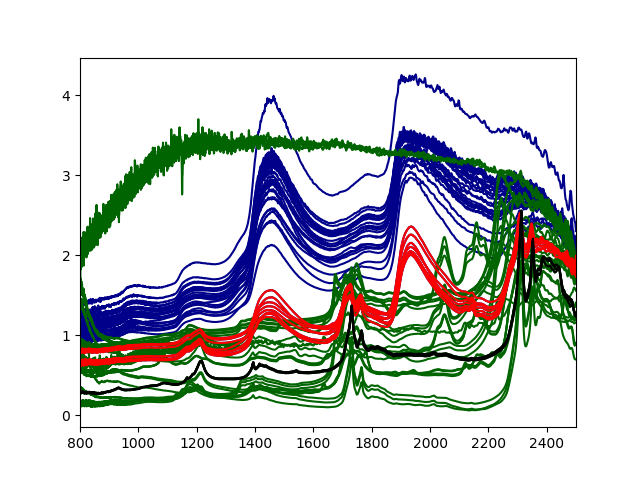

In [19]:
def get_columns(col_type):
    if col_type == "fillet":
        return [col for col in data.columns if (col_type in col) and ("fat" not in col) and ("liner" not in col) ]
    elif col_type == "fat":
        return [col for col in data.columns if (col_type in col) and ("plastic" not in col) ]
    elif col_type == "plastic":
        return [col for col in data.columns if (col_type in col) and ("fat" not in col) and ("fillet" not in col) ]
    elif col_type == "marel_liner":
        return [col for col in data.columns if (col_type in col) and ("fat" not in col) and ("fillet" not in col) ]
    else:
        return [col for col in data.columns if col_type in col]
    

ax = data[get_columns("chicken")].plot(color='DarkBlue', label='Chicken', legend=False)
data[get_columns("plastic")].plot(color='DarkGreen', label='Plastic', ax=ax, legend=False)
data[get_columns("fat")].plot(color='Red', label='Fat', ax=ax, legend=False)
data[get_columns("marel_liner")].plot(color='Black', label='Fat', ax=ax, legend=False)
plt.show()


<IPython.core.display.Javascript object>


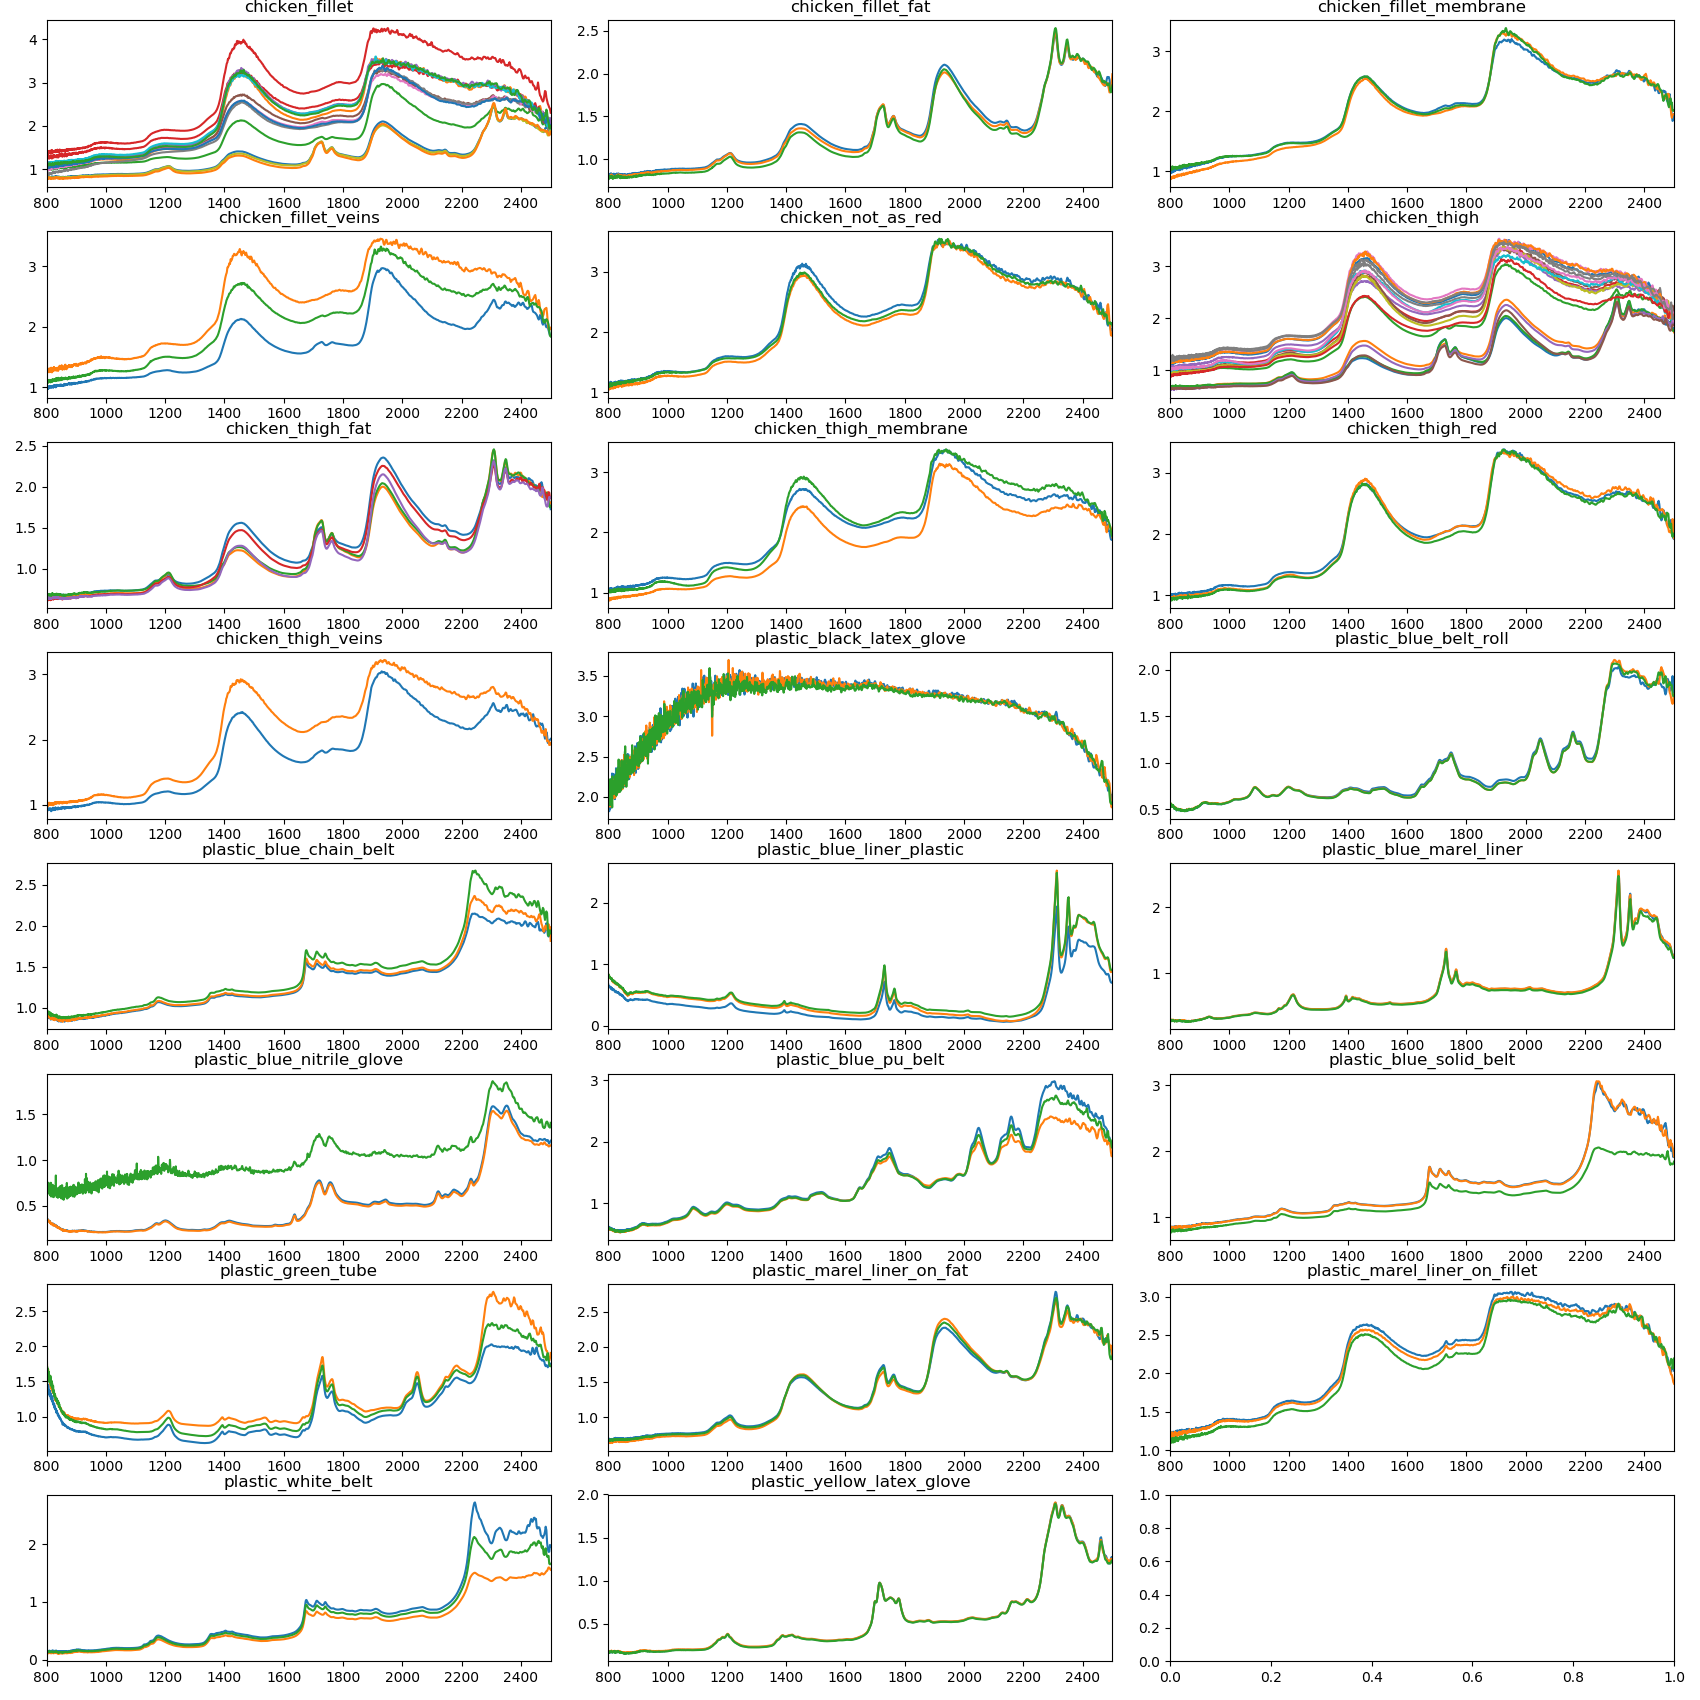

In [20]:
samples = list(set([col[:-2] for col in data.columns]))
samples.sort()

nrows=8
ncols=3

def get_next(count):
    i = count // ncols
    j = count % ncols
    return i, j
    
fig, axes = plt.subplots(figsize=(17, 17), nrows=nrows, ncols=ncols)
fig.tight_layout()

count = 0
for sampl in samples:
    i, j = get_next(count)
    data[get_columns(sampl)].plot(ax=axes[i, j], legend=False)
    axes[i, j].set_title(sampl)
    count += 1

In [21]:
# Take one spectra -> chicken 
# Add the obsorbtion bands
#   - H20
# Plot the first and second derivative

# TODO: Check this -> https://nirpyresearch.com/two-scatter-correction-techniques-nir-spectroscopy-python/

<IPython.core.display.Javascript object>


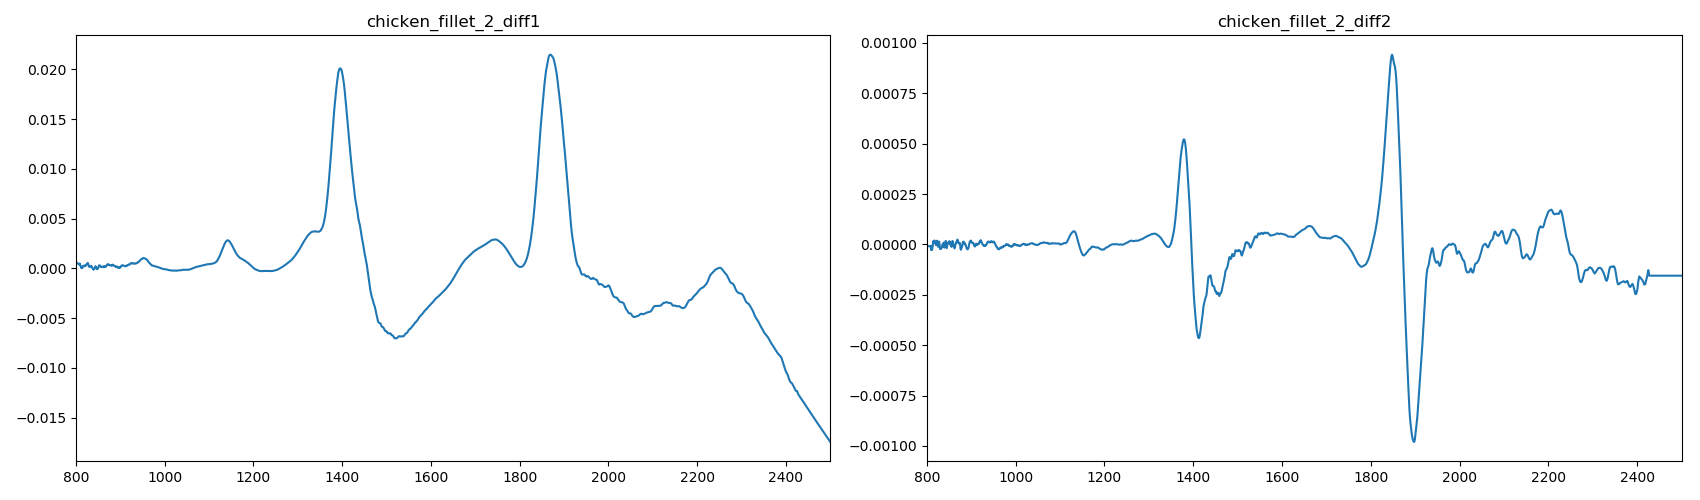

In [22]:
df = data[['chicken_fillet_2']].copy()

# Get the first derivative
df['chicken_fillet_2_diff1'] = scipy.signal.savgol_filter(df['chicken_fillet_2'], window_length=63, polyorder = 2, deriv=1)

# Second derivative
df['chicken_fillet_2_diff2'] = scipy.signal.savgol_filter(df['chicken_fillet_2'], window_length=63, polyorder = 2, deriv=2)

fig, axes = plt.subplots(figsize=(17, 5), nrows=1, ncols=2)

df['chicken_fillet_2_diff1'].plot(ax=axes[0], legend=False)
axes[0].set_title('chicken_fillet_2_diff1')
df['chicken_fillet_2_diff2'].plot(ax=axes[1], legend=False)
axes[1].set_title('chicken_fillet_2_diff2')
fig.tight_layout()

<IPython.core.display.Javascript object>


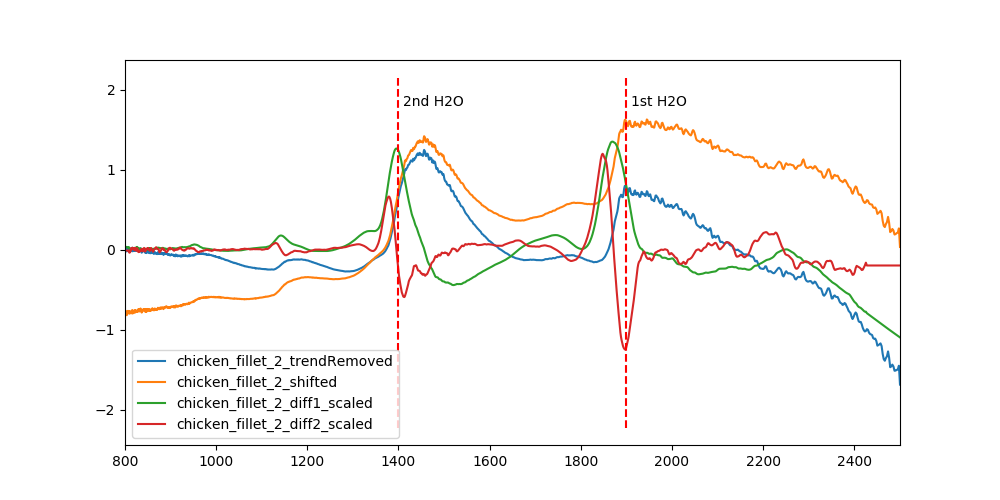

In [23]:
def add_spectral_absorbtion_bands(ax):
    def draw(wavelength, text):
        ax.text(wavelength + 10, ylim[1], text)
        plt.plot((wavelength, wavelength), np.array(ylim)*1.2, 'r--')
        
    ylim = ax.get_ylim()
    
    # 2nd H2O overtone
    wavelength = 1400
    draw(wavelength, '2nd H2O')
    
    # 1st H2O overtone
    wavelength = 1900
    draw(wavelength, '1st H2O')
    
def remove_trend(series):
    # Get the linear best fit
    index = series.index
    reg = LinearRegression().fit(np.array(index).reshape(-1, 1), np.array(series))
    linear_fit = reg.predict(np.array(index).reshape(-1, 1))
    return series - linear_fit
    

max_original, max_diff1, max_diff2 = df[['chicken_fillet_2', 'chicken_fillet_2', 'chicken_fillet_2']].max()

max_original, max_diff1, max_diff2 = df[['chicken_fillet_2', 'chicken_fillet_2_diff1', 'chicken_fillet_2_diff2']].max()
min_original, min_diff1, min_diff2 = df[['chicken_fillet_2', 'chicken_fillet_2_diff1', 'chicken_fillet_2_diff2']].min()


df['chicken_fillet_2_trendRemoved'] = remove_trend(df['chicken_fillet_2'])
df['chicken_fillet_2_shifted'] = df['chicken_fillet_2'] - df['chicken_fillet_2'].mean()
df['chicken_fillet_2_diff1_scaled'] = df['chicken_fillet_2_diff1'] * (max_original - min_original) / (max_diff1 - min_diff1)
df['chicken_fillet_2_diff2_scaled'] = df['chicken_fillet_2_diff2'] * (max_original - min_original) / (max_diff2 - min_diff2)

ax = df[['chicken_fillet_2_trendRemoved', 'chicken_fillet_2_shifted', 'chicken_fillet_2_diff1_scaled', 'chicken_fillet_2_diff2_scaled']].plot(figsize=(10, 5))
add_spectral_absorbtion_bands(ax)

<IPython.core.display.Javascript object>


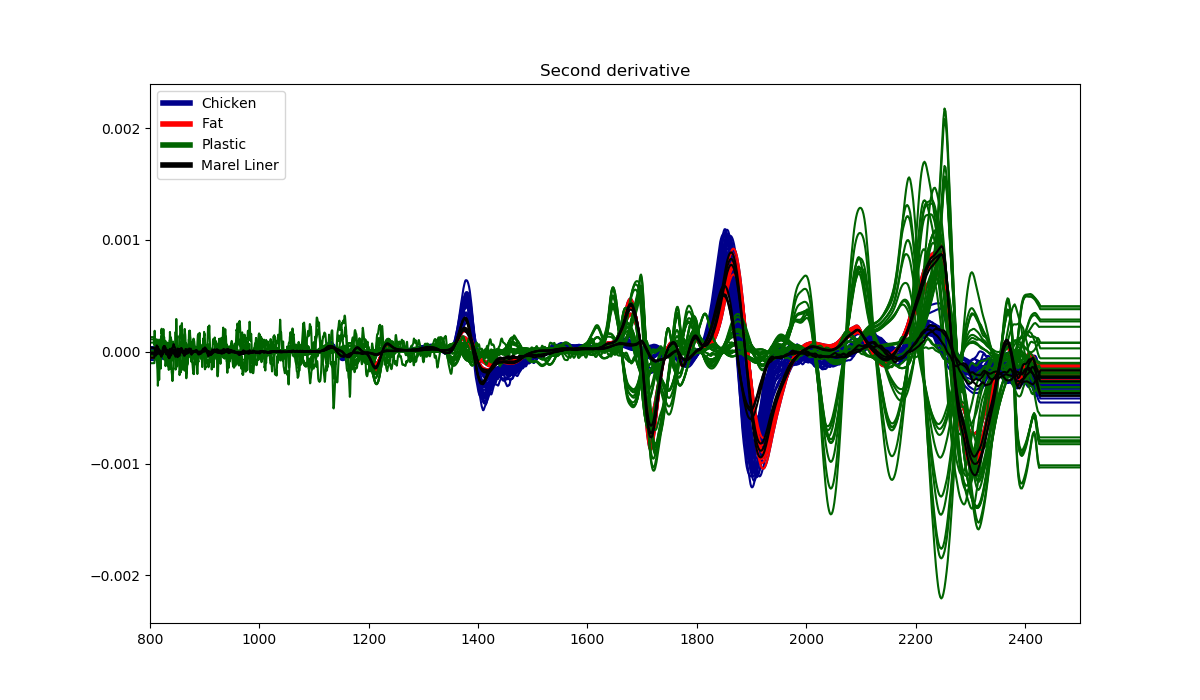

In [24]:
def second_derivative(series):
    series = series.copy()
    series.iloc[:] = scipy.signal.savgol_filter(series, window_length=63, polyorder = 2, deriv=2)
    return series
    

data_diff = data.apply(second_derivative, axis=0)

ax = data_diff[get_columns("chicken")].plot(figsize=(12, 7), color='DarkBlue', label='Chicken', legend=False)
data_diff[get_columns("fat")].plot(color='Red', label='Fat', ax=ax, legend=False)
data_diff[get_columns("plastic")].plot(color='DarkGreen', label='Plastic', ax=ax, legend=False)
data_diff[get_columns("plastic_marel_liner")].plot(color='Black', label='Marel Liner', ax=ax, legend=False)
plt.title("Second derivative")

ax.legend([Line2D([0], [0], color='DarkBlue', lw=4),
           Line2D([0], [0], color='Red', lw=4),
           Line2D([0], [0], color='DarkGreen', lw=4),
           Line2D([0], [0], color='Black', lw=4)], ['Chicken', 'Fat', 'Plastic', 'Marel Liner']);

<IPython.core.display.Javascript object>


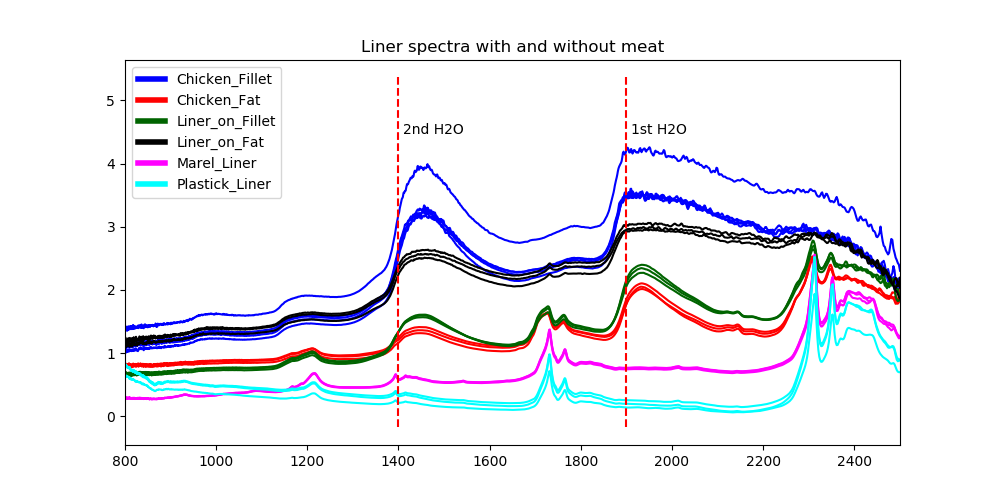

<IPython.core.display.Javascript object>


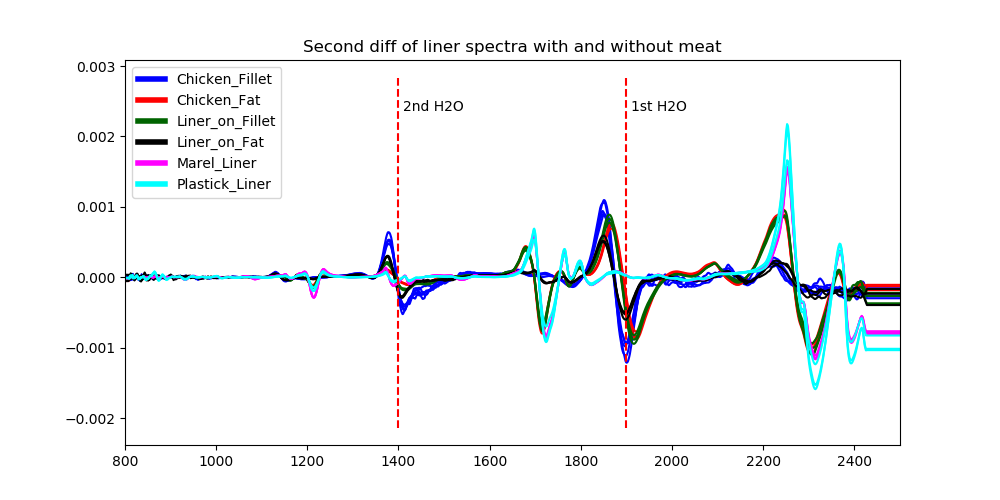

In [25]:
def plot_groups(data, **kwargs):
    colors = ['Blue', 'Red', 'DarkGreen', 'Black', 'Magenta', 'Cyan', 'Yellow', 'White', 'DarkBlue']
    
    ax = None
    i = 0
    lines, labels = [], []
    for key, values in kwargs.items():
        color = colors[i]
        ax = data[values].plot(figsize=(10, 5), ax=ax, color=color, legend=False)
        lines.append(Line2D([0], [0], color=color, lw=4))
        labels.append(key)
        i += 1
        
    ax.legend(lines, labels)
    add_spectral_absorbtion_bands(ax)
    
def plot_liner_stuff(data):
    plot_groups(data, 
                Chicken_Fillet  = ['chicken_fillet_1', 'chicken_fillet_2', 'chicken_fillet_3', 'chicken_fillet_4', 'chicken_fillet_5'],
                Chicken_Fat     = ['chicken_fillet_fat_1', 'chicken_fillet_fat_2', 'chicken_fillet_fat_3'],
                Liner_on_Fillet = ['plastic_marel_liner_on_fat_1', 'plastic_marel_liner_on_fat_2', 'plastic_marel_liner_on_fat_3'],
                Liner_on_Fat    = ['plastic_marel_liner_on_fillet_1', 'plastic_marel_liner_on_fillet_2', 'plastic_marel_liner_on_fillet_3'],
                Marel_Liner     = ['plastic_blue_marel_liner_1', 'plastic_blue_marel_liner_2', 'plastic_blue_marel_liner_3'],
                Plastick_Liner  = ['plastic_blue_liner_plastic_1', 'plastic_blue_liner_plastic_2', 'plastic_blue_liner_plastic_3'])

plot_liner_stuff(data)
plt.title("Liner spectra with and without meat");

plot_liner_stuff(data_diff)
plt.title("Second diff of liner spectra with and without meat");

The wavelength 1360 to 1420, 1810 to 1930 and 2180 to 2380 seem to give the best seperation for these classes. Here next are zoomed in plots for these ranges.

<IPython.core.display.Javascript object>


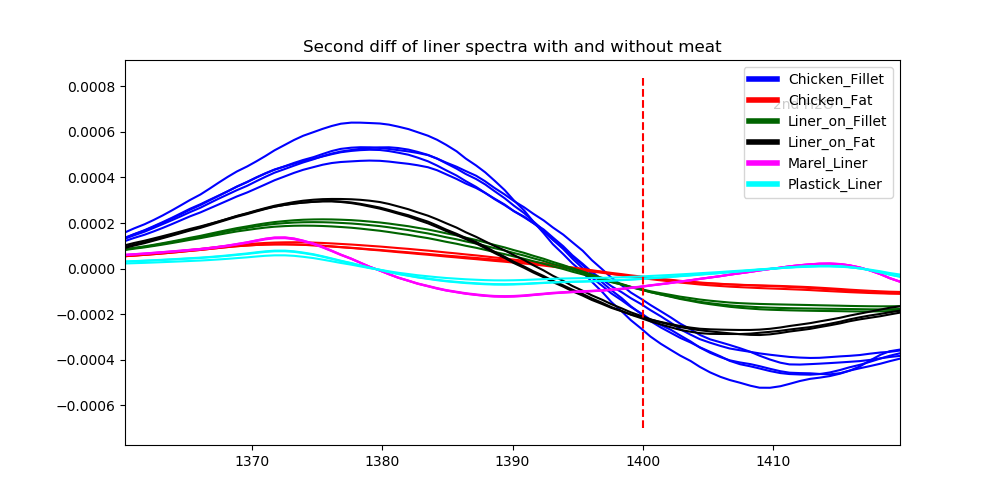

In [26]:
plot_liner_stuff(data_diff[1360:1420])
plt.title("Second diff of liner spectra with and without meat");

<IPython.core.display.Javascript object>


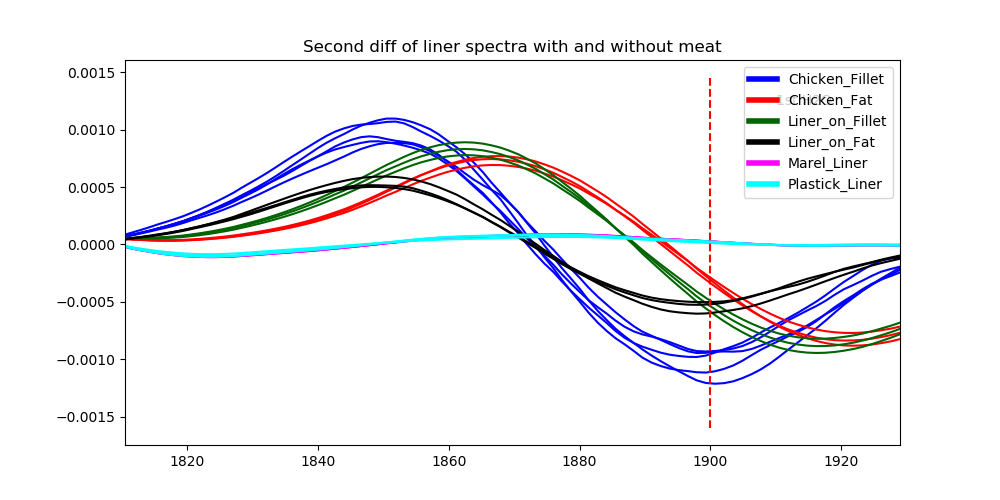

In [27]:
plot_liner_stuff(data_diff[1810:1930])
plt.title("Second diff of liner spectra with and without meat");

<IPython.core.display.Javascript object>


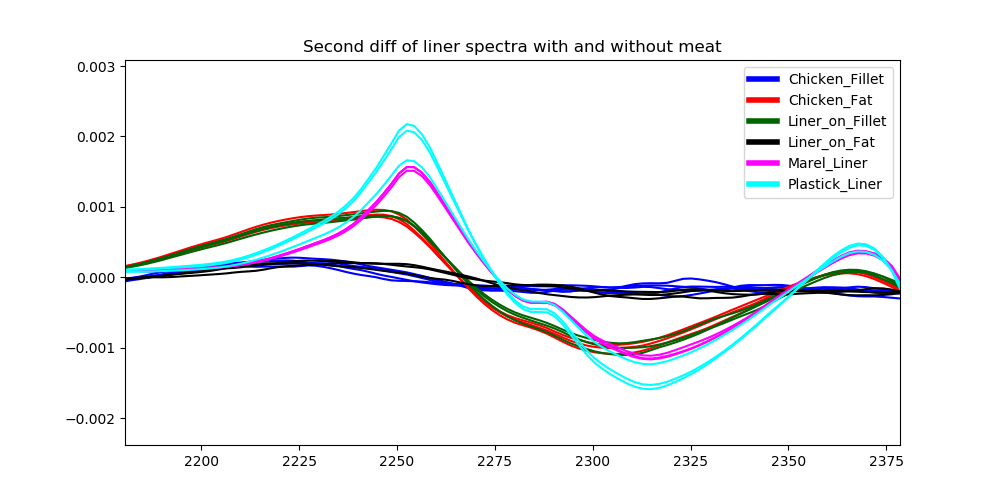

In [28]:
plot_liner_stuff(data_diff[2180:2380])
plt.title("Second diff of liner spectra with and without meat");

Setup the problem with Y as meat, fat and plastic and then X as the corresponding spectra reflectance
Run a PLS fit on the data
    -> https://nirpyresearch.com/partial-least-squares-regression-python/
And then do the same after preselecting the wavelength bands from the spectra to figure out "the most important spectra bands".

In [13]:
groups = {"Chicken_Fillet": ['chicken_fillet_1', 'chicken_fillet_2', 'chicken_fillet_3', 'chicken_fillet_4', 'chicken_fillet_5'],
                "Chicken_Fat": ['chicken_fillet_fat_1', 'chicken_fillet_fat_2', 'chicken_fillet_fat_3'],
                "Liner_on_Fillet": ['plastic_marel_liner_on_fat_1', 'plastic_marel_liner_on_fat_2', 'plastic_marel_liner_on_fat_3'],
                "Liner_on_Fat": ['plastic_marel_liner_on_fillet_1', 'plastic_marel_liner_on_fillet_2', 'plastic_marel_liner_on_fillet_3'],
                "Marel_Liner": ['plastic_blue_marel_liner_1', 'plastic_blue_marel_liner_2', 'plastic_blue_marel_liner_3'],
                "Plastick_Liner": ['plastic_blue_liner_plastic_1', 'plastic_blue_liner_plastic_2', 'plastic_blue_liner_plastic_3']}

X = data[[col for col in data.columns if 'liner' not in col]].T.copy()
Y = np.array(X.index)
X = X.values

In [14]:
def to_labels(item):
    if "plastic" in item:
        return 0
    else: # Chicken
        return 1
    
Y = np.array(list(map(to_labels, Y)))

In [15]:
# import sklearn
# help(sklearn.cross_decomposition.pls_)
# help(PLSRegression)

Then finally run a PLS regression on the second derivative of the spectral bands.

50% completed
Suggested number of components:  7

R2 calib: 0.990
R2 CV: 0.982
MSE calib: 0.003
MSE CV: 0.004


<IPython.core.display.Javascript object>


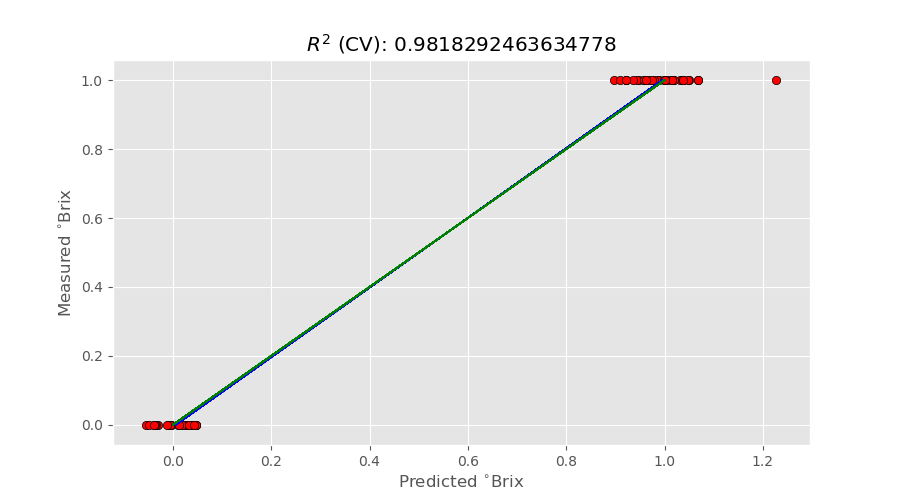

In [16]:
from sys import stdout

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import savgol_filter
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

def optimise_pls_cv(X, y, n_comp, plot_components=True):
    '''Run PLS including a variable number of components, up to n_comp,
       and calculate MSE '''
    mse = []
    component = np.arange(1, n_comp)
    for i in component:
        pls = PLSRegression(n_components=i)
        # Cross-validation
        y_cv = cross_val_predict(pls, X, y, cv=10)
        mse.append(mean_squared_error(y, y_cv))
        comp = 100*(i+1)/40
        # Trick to update status on the same line
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
    # Calculate and print the position of minimum in MSE
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    stdout.write("\n")
    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(left=-1)
        plt.show()
    # Define PLS object with optimal number of components
    pls_opt = PLSRegression(n_components=msemin+1)
    # Fir to the entire dataset
    pls_opt.fit(X, y)
    y_c = pls_opt.predict(X)
    # Cross-validation
    y_cv = cross_val_predict(pls_opt, X, y, cv=10)
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
    # Calculate mean squared error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)
    # Plot regression and figures of merit
    rangey = max(y) - min(y)
    rangex = max(y_c) - min(y_c)
    # Fit a line to the CV vs response
    z = np.polyfit(y, y_c, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y_c, y, c='red', edgecolors='k')
        #Plot the best fit line
        ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
        #Plot the ideal 1:1 line
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
        plt.show()
    return

optimise_pls_cv(X, Y, 20, plot_components=True)